In [4]:
import os
import datetime

import numpy as np
import pandas as pd
import geopandas as gp

In [5]:
in_c2vsim = pd.read_csv("../data/discharge/inflow_c2vsim/inflow.csv")
out_c2vsim = pd.read_csv("../data/discharge/outflow_c2vsim/outflow.csv")

in_c2vsim['date'] = in_c2vsim.date.str.slice(stop=-6)
in_c2vsim['date'] = pd.to_datetime(in_c2vsim['date'], format='%m/%d/%Y')
in_c2vsim['date'] = in_c2vsim['date'].dt.strftime('%m-%Y')
in_c2vsim = in_c2vsim.set_index('date')

out_c2vsim['date'] = out_c2vsim.date.str.slice(stop=-6)
out_c2vsim['date'] = pd.to_datetime(out_c2vsim['date'], format='%m/%d/%Y')
out_c2vsim['date'] = out_c2vsim['date'].dt.strftime('%m-%Y')
out_c2vsim = out_c2vsim.set_index('date')



<AxesSubplot:xlabel='date'>

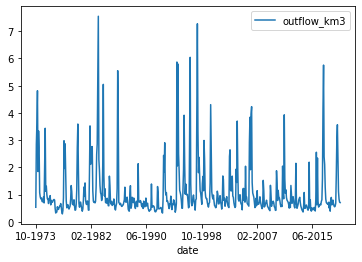

In [6]:
out_c2vsim.plot()

In [7]:
in_c2vsim = in_c2vsim.rename(columns={"inflow_km3" : "C2Vsim_inflow_km3"}, errors="raise")
out_c2vsim = out_c2vsim.rename(columns={"outflow_km3" : "C2Vsim_outflow_km3"}, errors="raise")

In [8]:
indf_w_sac = pd.read_csv("../data/inflow_w_sac.csv")
outdf_w_sac = pd.read_csv("../data/outflow_w_sac.csv")

In [9]:
indf_w_sac = indf_w_sac.rename(columns={"Unnamed: 0": "date", "inflow_km3" : "USGS_inflow_incSac_km3"}, errors="raise")
indf_w_sac['date'] = pd.to_datetime(indf_w_sac['date'], format='%Y-%m-%d')
indf_w_sac['date'] = indf_w_sac['date'].dt.strftime('%m-%Y')
indf_w_sac = indf_w_sac.set_index('date')

In [10]:
outdf_w_sac = outdf_w_sac.rename(columns={"Unnamed: 0": "date", "outflow_km3" : "USGS_outflow_incSac_km3"}, errors="raise")
outdf_w_sac['date'] = pd.to_datetime(outdf_w_sac['date'], format='%Y-%m-%d')
outdf_w_sac['date'] = outdf_w_sac['date'].dt.strftime('%m-%Y')
outdf_w_sac = outdf_w_sac.set_index('date')

In [11]:
indf_no_sac = pd.read_csv("../data/inflow_no_sac.csv")
outdf_no_sac = pd.read_csv("../data/outflow_no_sac.csv")

In [12]:
indf_no_sac = indf_no_sac.rename(columns={"Unnamed: 0": "date", "inflow_km3" : "USGS_inflow_noSac_km3"}, errors="raise")
indf_no_sac['date'] = pd.to_datetime(indf_no_sac['date'], format='%Y-%m-%d')
indf_no_sac['date'] = indf_no_sac['date'].dt.strftime('%m-%Y')
indf_no_sac = indf_no_sac.set_index('date')

In [13]:
outdf_no_sac = outdf_no_sac.rename(columns={"Unnamed: 0": "date", "outflow_km3" : "USGS_outflow_noSac_km3"}, errors="raise")
outdf_no_sac['date'] = pd.to_datetime(outdf_no_sac['date'], format='%Y-%m-%d')
outdf_no_sac['date'] = outdf_no_sac['date'].dt.strftime('%m-%Y')
outdf_no_sac = outdf_no_sac.set_index('date')

In [14]:
comb = pd.concat([indf_w_sac,outdf_w_sac,indf_no_sac,outdf_no_sac, in_c2vsim, out_c2vsim], axis = 1)

In [15]:
comb = comb[comb['USGS_inflow_incSac_km3'].notna()]
comb = comb[comb['USGS_outflow_incSac_km3'].notna()]
comb = comb[comb['USGS_inflow_noSac_km3'].notna()]
comb = comb[comb['USGS_outflow_noSac_km3'].notna()]
comb = comb[comb['C2Vsim_inflow_km3'].notna()]
comb = comb[comb['C2Vsim_outflow_km3'].notna()]

Text(0.5, 1.0, 'Comparing Surface Water Inflow/Outflow in Butte County')

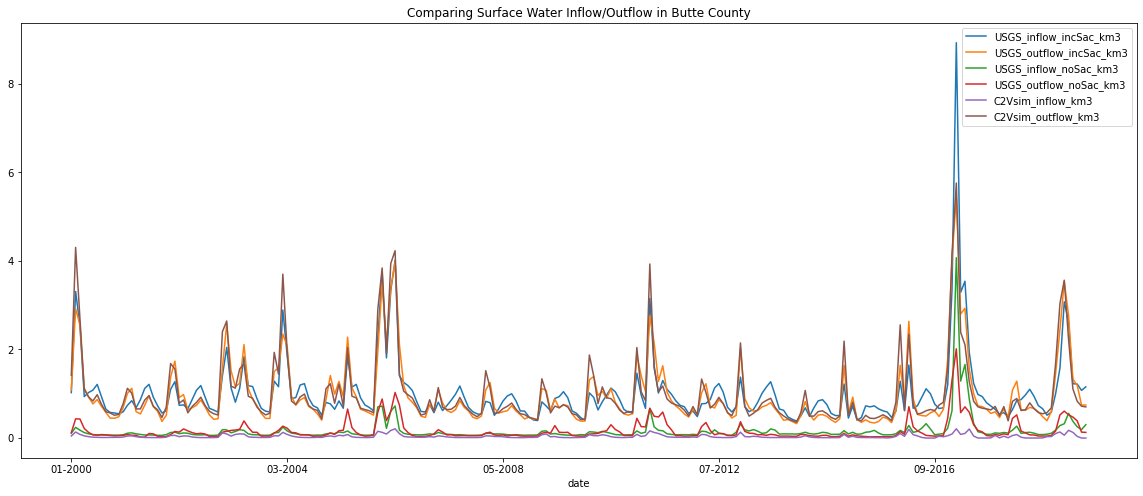

In [19]:
fig = comb.plot(figsize=(20, 8))
fig.set_title("Comparing Surface Water Inflow/Outflow in Butte County")

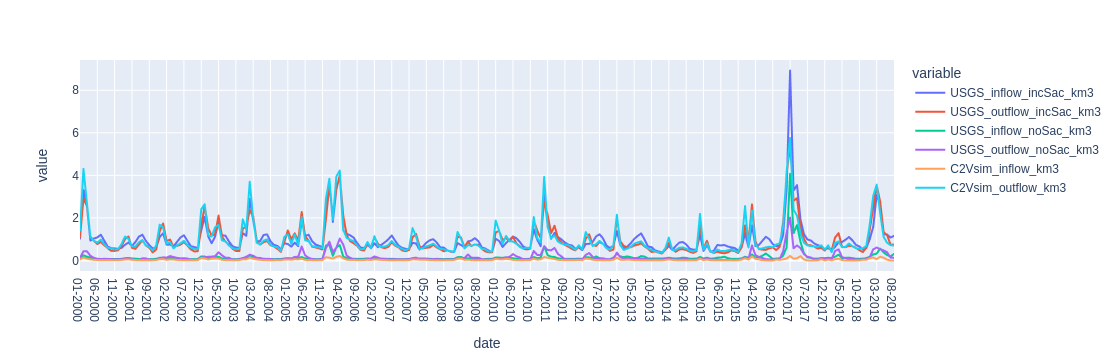

In [23]:
fig = px.line(comb, x=comb.index, y=['USGS_inflow_incSac_km3','USGS_outflow_incSac_km3', 'USGS_inflow_noSac_km3','USGS_outflow_noSac_km3','C2Vsim_inflow_km3', 'C2Vsim_outflow_km3'])
fig.show()

Mapping

In [24]:
geodf = gpd.read_file('../gauges/usgs_gauges.shp')

In [25]:
modeldf = gpd.read_file('../shape/butte_gw_model.shp')

In [26]:
in_model = ['11377100', '11383500', '11390000', '11406900', '11407000', '11389500', '11421000']
# 1 is in, -1 is out
val = [1,1,1,1,1,-1,-1]

In [27]:
geodf = geodf.loc[geodf['gauge_id'].isin(in_model)]

In [28]:
geodf['io'] = val

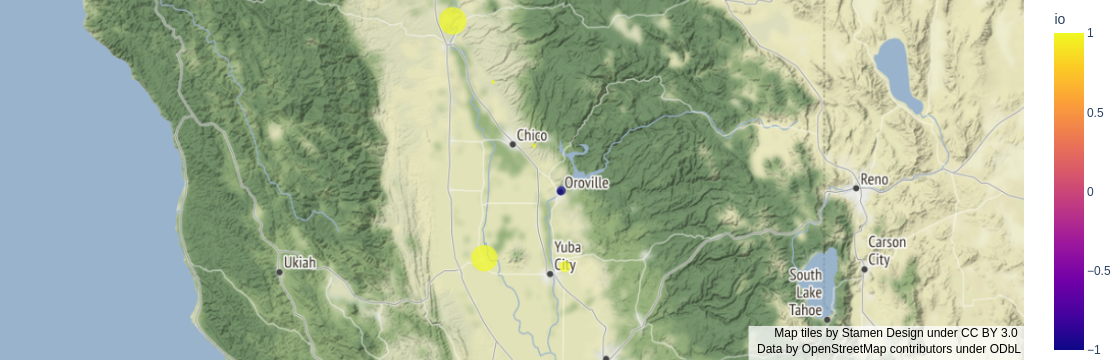

In [29]:
fig = px.scatter_mapbox(geodf, lat=geodf.geometry.y,
                        lon=geodf.geometry.x, size="q_km3_avg", color="io",mapbox_style="stamen-terrain",center={"lat": 39.57, "lon": -121.8375},
                  color_continuous_scale=px.colors.sequential.Plasma, zoom=6.9,hover_name="gauge_id")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [31]:
butteco = gpd.read_file('../shape/butte_gw_model.shp') # Butte_co_rpj.shp')
bclat = []
bclon = []
for feature in butteco.geometry:
    templon, templat = feature.exterior.coords.xy
    bclat = np.append(bclat,templat)
    bclon = np.append(bclon,templon)

In [34]:
butte = gpd.read_file('../shape/c2vsim_subregion5.shp')
latsb = []
lonsb = []
namesb = []
for feature, name in zip(butte.geometry, butte.SubRegion):
    if isinstance(feature, shapely.geometry.Polygon):
        linestrings = [feature]
    for linestring in linestrings:
        print(linestring.exterior.coords)
        x, y = linestring.exterior.coords.xy
        latsb = np.append(latsb, y)
        lonsb = np.append(lonsb, x)
        namesb = np.append(namesb, [name]*len(y))
        latsb = np.append(latsb, None)
        lonsb = np.append(lonsb, None)
        namesb = np.append(namesb, None)

In [33]:
rivers = gpd.read_file('../data/stream_c2vsim/c2vsimfg-v1_0_gis/C2VSimFG-V1_0_GIS/Shapefiles/C2VSimFG_StreamReaches.shp')
rivers = rivers.to_crs(4326)

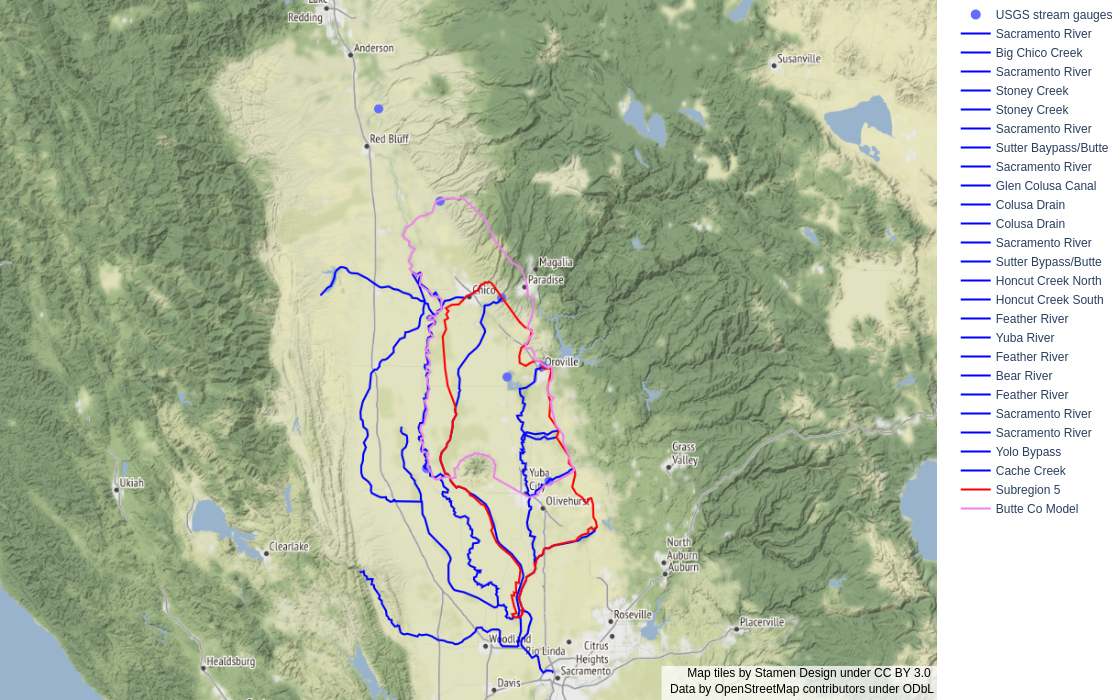

In [35]:
fig = go.Figure()
fig.add_trace(go.Scattermapbox(
    mode = "markers",
    hovertext='text',
    text=geodf['gauge_id'],
    name="USGS stream gauges",
    lon = geodf.geometry.x,
    lat = geodf.geometry.y,
    marker = {'size': 10}))

lats = []
lons = []
names = []

for feature, rivname in zip(rivers.geometry, rivers.Name):
    if isinstance(feature, shapely.geometry.linestring.LineString):
        rlon = []
        rlat = []
        templon, templat = feature.xy
        rlat = np.append(rlat,templat)
        rlon = np.append(rlon,templon)
        include_lat = any(i > 38.75 for i in rlat) and any(j < 39.75 for j in rlat)
        include_lon = any(i > -121.9 for i in rlat) and any(j < -121for j in rlat)
        if include_lat or include_lon:
            fig.add_trace(go.Scattermapbox(
                mode="lines",

                lat=rlat,
                lon=rlon,
                name=rivname,
                line = dict(width = 2, 
        color = 'blue'), opacity=1))

fig.add_trace(go.Scattermapbox(
    mode="lines",
    lon=lonsb, 
    lat=latsb,
    name = "Subregion 5",
    line = dict(width = 2, 
    color = 'red'), opacity=1))

fig.add_trace(go.Scattermapbox(
    mode="lines",
    lon=bclon, 
    lat=bclat,
    name = "Butte Co Model",
    line = dict(width = 2, 
    color = 'violet'), opacity=1))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'style': "stamen-terrain",
        'center': {"lat": 39.57, "lon": -121.8375},
        'zoom': 7.5}, width=700,
                  height=700,)

fig.show()

Fmr 05

In [37]:
# Spatial join usgs gauges to butte co / gw model combined area

gdf = gpd.read_file("../shape/usgs_gauges.shp")
# butte_gwm = gp.read_file("../shape/butte_gw_model.shp")
# butte_gwm = butte_gwm.to_crs("EPSG:4326")
butte_gwm = gpd.read_file('../shape/c2vsim_subregion5.shp')
# overlap_gdf = butte_gwm.union(gp.read_file("../shape/Butte_co_rpj.shp"))
# overlap_gdf = gp.GeoDataFrame(geometry = overlap_gdf)
# overlap_gdf.set_crs = "EPSG:4326"

gauges_within = gpd.sjoin(gdf.to_crs(crs="EPSG:4326"), gpd.GeoDataFrame(butte_gwm, crs="EPSG:4326"), how='inner', predicate='within')
gauges_within.to_file("../shape/gauges_in_butte.shp")

/tmp/ipykernel_15967/1102435264.py:12: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



In [38]:
# Read the station level discharge data 
data_dir = "../data/discharge"
inflow_dir = os.path.join(data_dir,"inflow")
outflow_dir = os.path.join(data_dir,"outflow")

In [39]:
incsvs = [os.path.join(inflow_dir,x) for x in os.listdir(inflow_dir)]
indfs = [pd.read_csv(x, sep = '\t') for x in incsvs]

In [40]:
outcsvs = [os.path.join(outflow_dir,x) for x in os.listdir(outflow_dir)]
outdfs = [pd.read_csv(x, sep = '\t') for x in outcsvs]

In [41]:
def filter_dfs(dflist):
    
    dfs_filt = []
    
    for df in dflist:

        # Get site id
        gauge_id = str(df['site_no'].unique()[0])
        outcolname = '{}_q_km3'.format(gauge_id)

        # Ft^3 / s to km^3 / mon
        df[outcolname] = df['mean_va'] * 2.83168e-11 * 2.628e+6

        # Get datetime 
        dtlist = []
        for idx, row in df[['year_nu','month_nu']].iterrows():
            dt = datetime.datetime(year=row['year_nu'], month=row['month_nu'], day=1)
            dtlist.append(dt)

        df.index = dtlist
        df = df[(df.index < '2022-06-01') & (df.index >= '2000-01-01')]
        dfs_filt.append(df[[outcolname]])
        
    return pd.concat(dfs_filt, axis = 1)

In [42]:
indf = pd.DataFrame(filter_dfs(indfs).sum(axis = 1))
indf.columns = ['inflow_km3']
outdf = pd.DataFrame(filter_dfs(outdfs).sum(axis = 1))
outdf.columns = ['outflow_km3']

<AxesSubplot:>

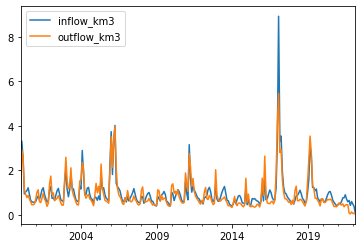

In [43]:
pd.concat([indf,outdf], axis = 1).plot()

In [44]:
indf.to_csv("../data/inflow.csv")
outdf.to_csv("../data/outflow.csv")

In [45]:
ingauges = [x.replace("_q_km3","") for x in filter_dfs(indfs).columns]
outgauges = [x.replace("_q_km3","") for x in filter_dfs(outdfs).columns]

In [49]:
gdf = gpd.read_file("../shape/usgs_gauges.shp")
butte_gwm = gpd.read_file("../shape/butte_gw_model.shp")
overlap_gdf = butte_gwm.union(gpd.read_file("../shape/Butte_co_rpj.shp"))
overlap_gdf = gpd.GeoDataFrame(geometry = overlap_gdf)
overlap_gdf.set_crs = "EPSG:4326"

gauges_within = gpd.sjoin(gdf, gpd.GeoDataFrame(overlap_gdf).to_crs("EPSG:4326"), how='inner', predicate='within')
gauges_within.to_file("../shape/gauges_in_butte.shp")

/tmp/ipykernel_15967/1569715810.py:8: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



<AxesSubplot:>

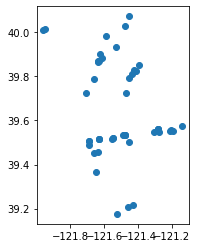

In [50]:
gauges_within.plot()

In [51]:
gauges_within['gauge_id'].values

array(['11395500', '11396000', '11396090', '11396200', '11396290',
       '11396310', '11396395', '11396396', '11396397', '11406818',
       '11406819', '11406820', '11404330', '11404360', '11404380',
       '11404400', '11404500', '11404900', '11405085', '11405120',
       '11405200', '11420750', '11420770', '11421000', '11383500',
       '11383515', '11389720', '11389740', '11389747', '11389750',
       '11389775', '11389780', '11389800', '11390000', '11406880',
       '11406890', '11406900', '11396329', '11396330', '11406810',
       '11406848', '11406849', '11406850', '11406910', '11406920',
       '11406930', '11406999', '11407000', '11407150'], dtype=object)